In [ ]:
#!pip install fbprophet

In [1]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [2]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [3]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

In [5]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [6]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

## Part 2: 2008 - 2011 Periods

### Historical Data - Decline

In [7]:
historical_period = "2000-2007"
prediction_period = "2008-2009"
index = "DJones"

query = '''
select * from DJones
where Date > "2000-01-01" and Date < "2008-01-01"
'''

data = pd.read_sql(query, conn)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,11502,11522,11306,11358,11358,1697500
1,2000-01-04,11350,11350,10986,10998,10998,1784200
2,2000-01-05,10989,11215,10939,11123,11123,2031900
3,2000-01-06,11113,11313,11098,11253,11253,1765500
4,2000-01-07,11247,11528,11240,11523,11523,1849000


In [8]:
crisis_hist_decline_DJ = data[['Date', 'Close']]

In [11]:
#crisis_hist_decline_DJ.to_sql(name = "crisis_hist_decline_DJ", if_exists="append", con=conn, index=False)

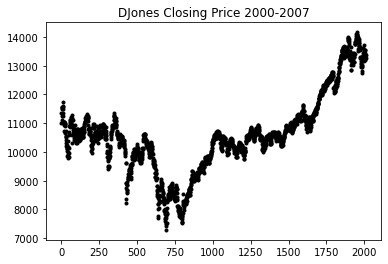

In [12]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title(f'{index} Closing Price {historical_period}')
plt.show()

### Predictive Model - Decline

In [13]:
data = data[['Date', 'Close']]
data = data.rename(columns = {"Date":"ds","Close":"y"})

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [14]:
crisis_predict_decline_DJ = prediction[['ds', 'trend', 'yhat_lower', 'yhat_upper']]
crisis_predict_decline_DJ.tail()

,ds,trend,yhat_lower,yhat_upper
2370,2008-12-26,16274.954713,14540.900098,17563.984896
2371,2008-12-27,16279.896460,14666.043981,17614.152538
2372,2008-12-28,16284.838208,14631.088425,17704.096359
2373,2008-12-29,16289.779955,14659.595471,17610.695505
2374,2008-12-30,16294.721703,14597.972326,17694.754082


In [17]:
#crisis_predict_decline_DJ.to_sql(name = 'crisis_predict_decline_DJ', if_exists='append', con=conn, index=False)

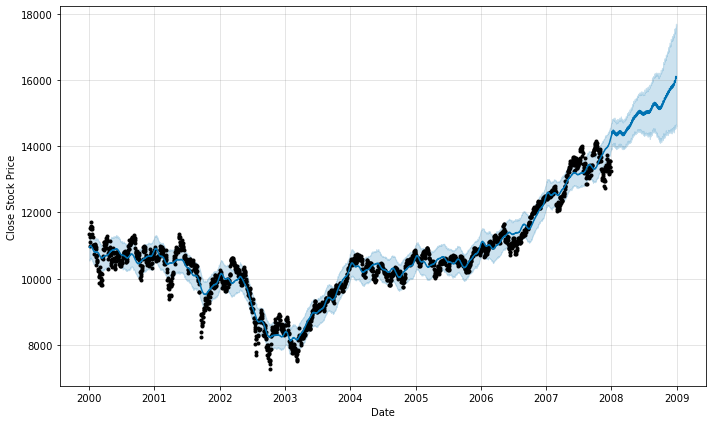

In [18]:
figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')

#### Summary: The predicition library failed to predict the decline

### Historical - Recovery

In [37]:
historical_period = "2000-2009"
prediction_period = "2009-2010"
index = "DJones"

query = '''
select * from DJones
where Date > "2000-01-01" and Date < "2009-07-31"
'''

data = pd.read_sql(query, conn)

crisis2_hist_recovery_DJ = data[['Date', 'Close']]
crisis2_hist_recovery_DJ.head()

,Date,Close
0,2000-01-03,11358
1,2000-01-04,10998
2,2000-01-05,11123
3,2000-01-06,11253
4,2000-01-07,11523


In [38]:
#crisis2_hist_recovery_DJ.to_sql(name = "crisis2_hist_recovery_DJ", if_exists="append", con=conn, index=False)

## Predict

In [29]:
data = data[['Date', 'Close']]

data = data.rename(columns = {"Date":"ds","Close":"y"})
#data.tail()

from fbprophet import Prophet

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)

In [33]:
crisis2_predict_recovery_DJ = prediction[['ds', 'trend', 'yhat_lower', 'yhat_upper']]
crisis2_predict_recovery_DJ.tail()

,ds,trend,yhat_lower,yhat_upper
2768,2010-07-26,4138.008153,2634.553889,5038.589233
2769,2010-07-27,4128.286894,2658.380249,5014.979523
2770,2010-07-28,4118.565634,2513.892178,4924.975564
2771,2010-07-29,4108.844374,2492.169819,5021.765148
2772,2010-07-30,4099.123115,2500.133798,4899.418322


In [36]:
#crisis2_predict_recovery_DJ.to_sql(name = 'crisis2_predict_recovery_DJ', if_exists='append', con=conn, index=False)

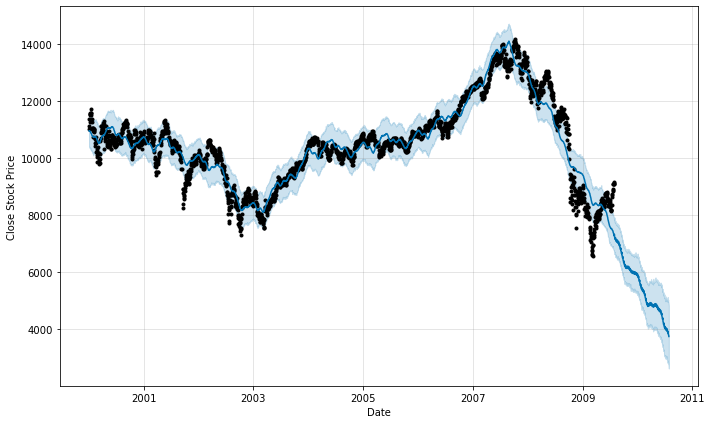

In [27]:
figure = m.plot(prediction)
#plt.title(f"{index} Prediction - {prediction_period}")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
#figure.savefig(f'../static/images/{index}_{prediction_period}.png')